# Feature engineering
In this notebook we will scale the numerical features and use ohe for categorical features, in order to observe the changes between original (after cleaning) data and the transformed data.

## 1. Import packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

In [2]:
filepath= "./jpn-hostel-data/clean.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,City,price.from,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km
0,Osaka,3300,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9
1,Fukuoka-City,2600,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7
2,Tokyo,3600,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8
3,Tokyo,2600,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7
4,Tokyo,1500,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5


## 2. Feature Scaling

In [4]:
num_features = df.select_dtypes(exclude="object").columns
num_features.to_list()

['price.from',
 'summary.score',
 'atmosphere',
 'cleanliness',
 'facilities',
 'location.y',
 'security',
 'staff',
 'valueformoney',
 'distance_km']

### 2.1 Using StandardScaler

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_features])

In [6]:
ss_df = pd.DataFrame(scaled_data, columns=num_features)
ss_df.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km
0,0.948039,0.427873,0.468982,0.314986,0.548279,0.174261,0.032971,0.235433,0.524214,-0.616640
1,0.095881,0.746429,0.840442,0.566826,0.706936,0.913847,0.216204,0.517121,0.622831,-1.094796
2,1.313250,-0.103053,-0.199646,-1.699736,0.310294,-0.657774,0.949135,0.798809,0.129744,0.448343
3,0.095881,-1.483461,-0.199646,-1.280002,-0.879633,-1.120015,-1.799357,-1.079113,-2.335690,0.643952
4,-1.243224,0.640244,0.914734,0.398933,0.310294,0.266709,0.491053,0.798809,0.622831,1.035171


### 2.2 Using RobustScaler

In [7]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[num_features])

In [8]:
rs_df = pd.DataFrame(scaled_data, columns=num_features)
rs_df.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km
0,0.888889,0.285714,0.272727,0.111111,0.24,-0.083333,-0.250,0.000,0.500,-0.258065
1,0.111111,0.714286,0.727273,0.444444,0.40,0.583333,0.000,0.375,0.625,-0.612903
2,1.222222,-0.428571,-0.545455,-2.555556,0.00,-0.833333,1.000,0.750,0.000,0.532258
3,0.111111,-2.285714,-0.545455,-2.000000,-1.20,-1.250000,-2.750,-1.750,-3.125,0.677419
4,-1.111111,0.571429,0.818182,0.222222,0.00,0.000000,0.375,0.750,0.625,0.967742


### 2.3 Visualizations

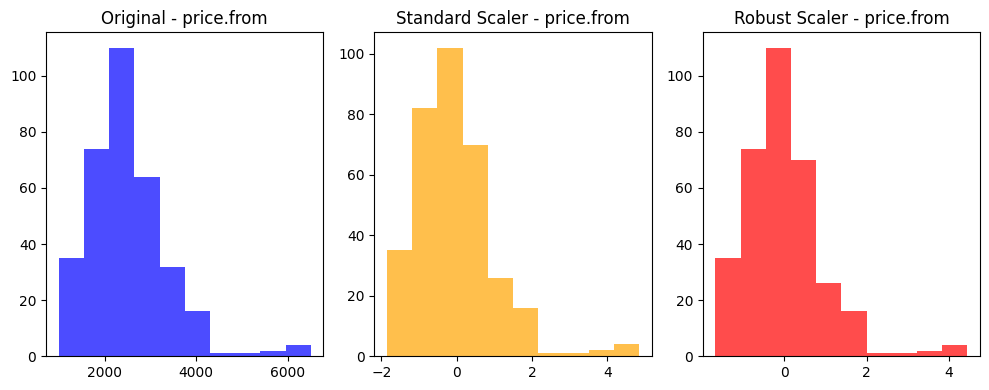

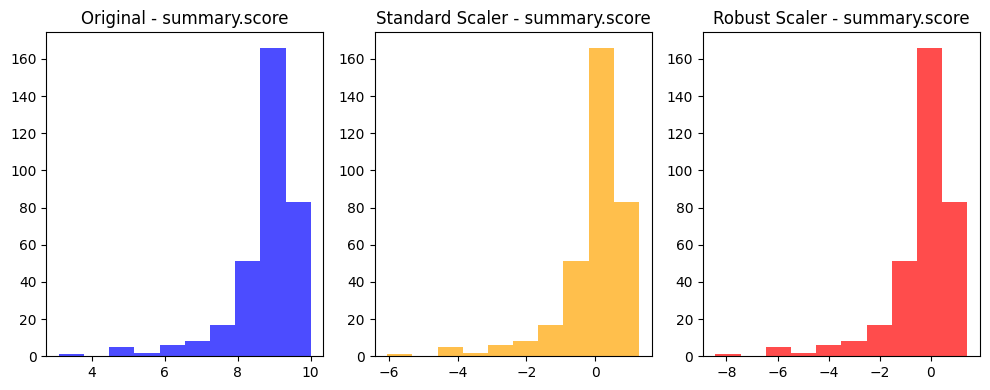

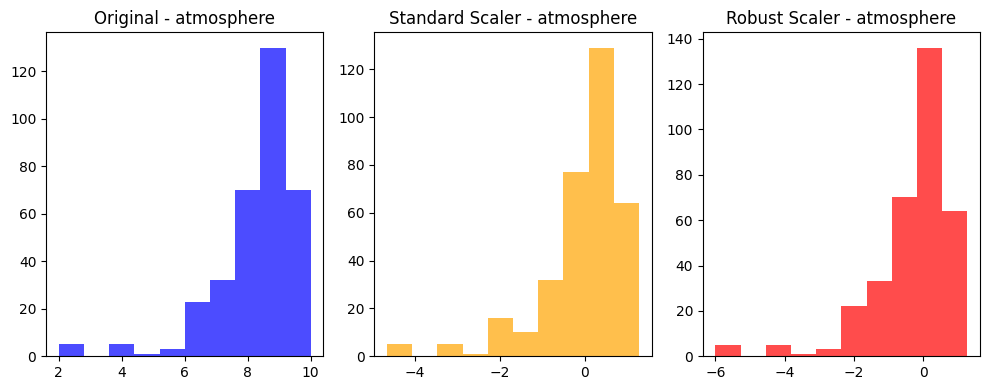

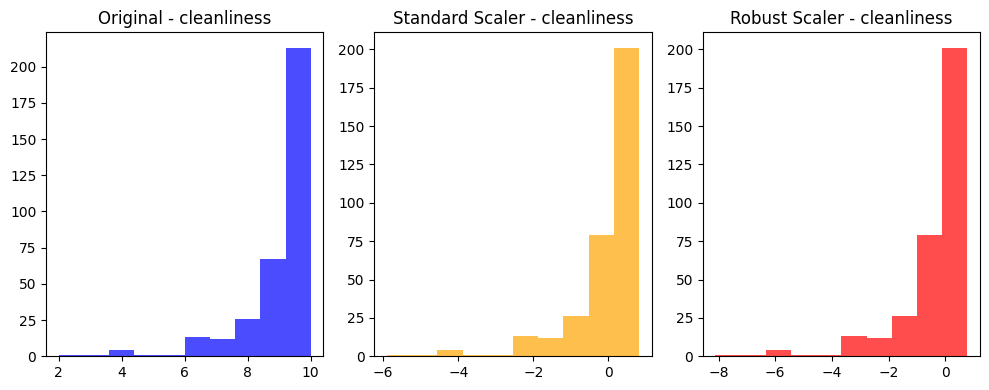

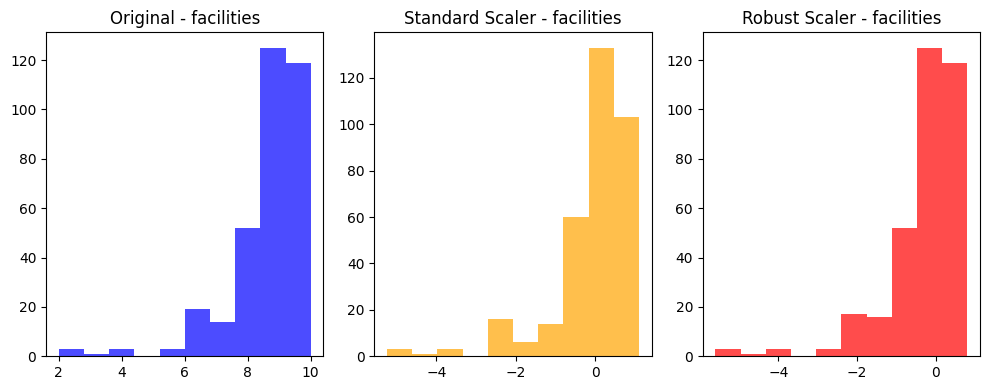

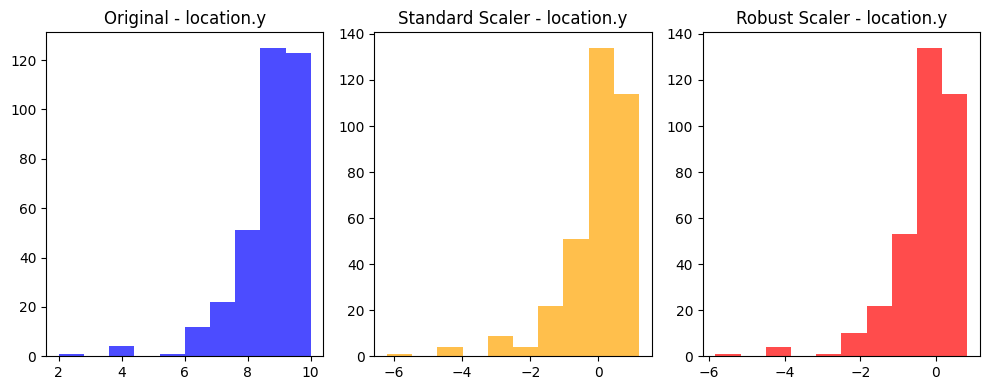

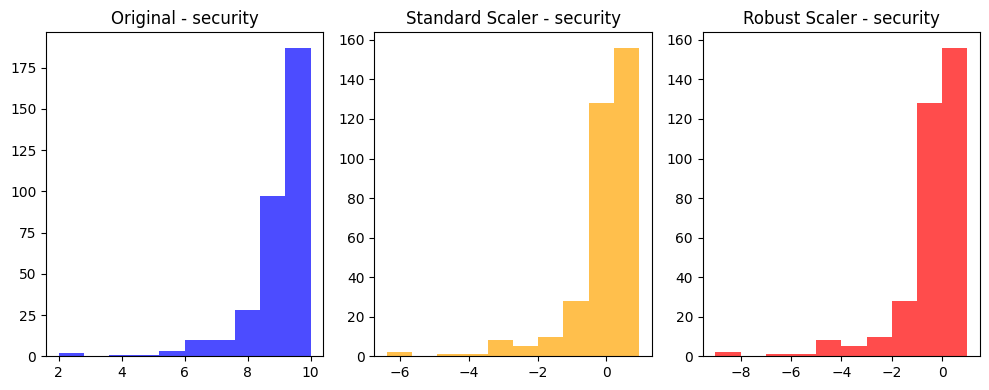

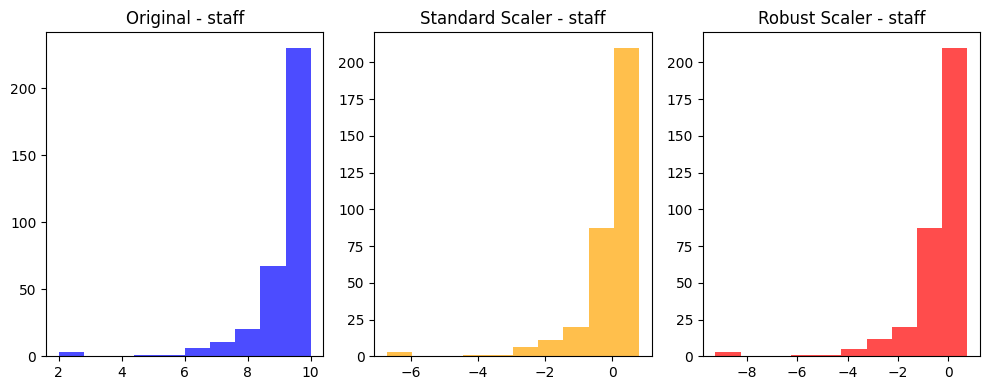

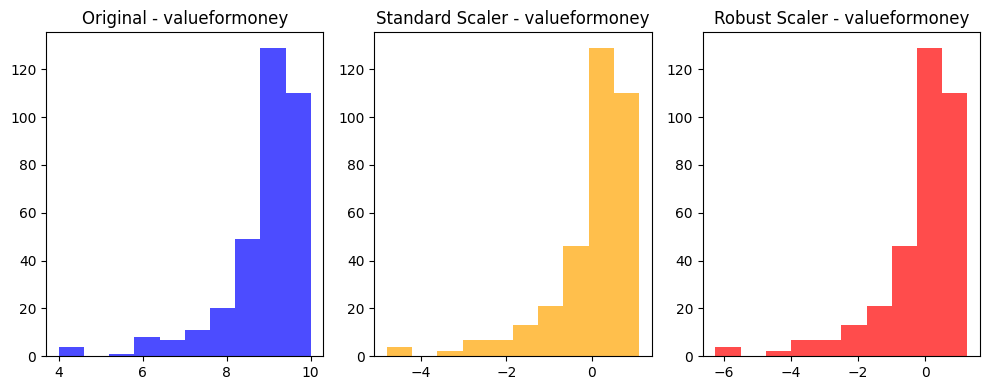

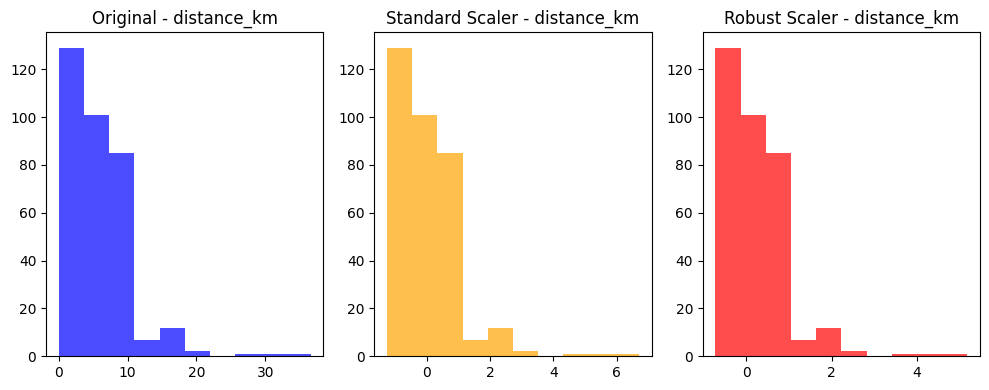

In [9]:
for feature in num_features:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    axes[0].hist(df[feature], bins=10, color='blue', alpha=0.7)
    axes[0].set_title(f'Original - {feature}')

    axes[1].hist(ss_df[feature], bins=10, color='orange', alpha=0.7)
    axes[1].set_title(f'Standard Scaler - {feature}')

    axes[2].hist(rs_df[feature], bins=10, color='red', alpha=0.7)
    axes[2].set_title(f'Robust Scaler - {feature}')

    plt.tight_layout()
    plt.show()

## 3. One Hot Encoding

In [10]:
cat_features = df.select_dtypes(include="object").columns
cat_features.to_list()

['City', 'rating.band']

In [11]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
enc_data = encoder.fit_transform(df[cat_features])

In [12]:
cat_feature_names = encoder.get_feature_names_out(cat_features)
enc_df = pd.DataFrame(enc_data.toarray(), columns=cat_feature_names)
enc_df.head()

,City_Hiroshima,City_Kyoto,City_Osaka,City_Tokyo,rating.band_Good,rating.band_Rating,rating.band_Superb,rating.band_Very Good
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
ndf = pd.concat([df, enc_df], axis=1)
# Drop the original categorical columns
ndf.drop(cat_features, axis=1, inplace=True)

In [14]:
ndf.head()

,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,distance_km,City_Hiroshima,City_Kyoto,City_Osaka,City_Tokyo,rating.band_Good,rating.band_Rating,rating.band_Superb,rating.band_Very Good
0,3300,9.2,8.9,9.4,9.3,8.9,9.0,9.4,9.4,2.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2600,9.5,9.4,9.7,9.5,9.7,9.2,9.7,9.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3600,8.7,8.0,7.0,9.0,8.0,10.0,10.0,9.0,7.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2600,7.4,8.0,7.5,7.5,7.5,7.0,8.0,6.5,8.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1500,9.4,9.5,9.5,9.0,9.0,9.5,10.0,9.5,10.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
print("Original data shape:", df.shape)
print("After OHE data shape:", ndf.shape)

Original data shape: (339, 12)
After OHE data shape: (339, 18)


## 4. Conclusion
- Since the data has outliers we can use the Robust Scaler for the numerical features.
- One-hot encoding adds 6 features to our data.